# LAB-20 班佛定律 Benford's Law

**班佛定律**，也被稱為第一位數法則，是一個關於在許多真實世界數據集中，首位數字出現頻率的觀察。 簡單來說，它指出數字 1 出現為首位數字的機率約為 30%，而數字 9 出現為首位數字的機率則小於 5%。

更詳細的說明：

* 非均勻分佈： 與直覺相反，數字 1 到 9 並非以相同的機率作為數據集中的首位數字。
* 對數分佈： 班佛定律指出，首位數字 d 出現的機率，可以用以下公式計算： P(d) = log10(1 + 1/d)

In [1]:
import os
import sys
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 使用前次 lab-19.csv 
data_file = "lab-19.csv"
# 讀取 CSV 檔案
df = pd.read_csv(data_file)

In [3]:
# 設定顯示的最大欄位數
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,選舉人,選舉名稱,收支科目,對象,ID,收入金額,支出金額,支出用途,金錢類,捐贈方式,返還/繳庫,揭露支出對象,更正註記,更正日期,收支
0,林岱樺,113年立法委員選舉,個人捐贈收入,蔡韻秋,NaN,10000.0,0.0,NaN,金錢,匯款,NaN,NaN,NaN,NaN,收入
1,林岱樺,113年立法委員選舉,個人捐贈收入,王信宗,NaN,10000.0,0.0,NaN,金錢,匯款,NaN,NaN,NaN,NaN,收入
2,林岱樺,113年立法委員選舉,個人捐贈收入,張寶仁,NaN,10000.0,0.0,NaN,金錢,匯款,NaN,NaN,NaN,NaN,收入
3,林岱樺,113年立法委員選舉,個人捐贈收入,袁新民,NaN,10000.0,0.0,NaN,金錢,匯款,NaN,NaN,NaN,NaN,收入
4,林岱樺,113年立法委員選舉,個人捐贈收入,邱明正,T12*******,10000.0,0.0,NaN,金錢,匯款,NaN,NaN,NaN,NaN,收入
5,林岱樺,113年立法委員選舉,人民團體捐贈收入,社團法人高雄市醫師公會,NaN,60000.0,0.0,NaN,金錢,票據,NaN,NaN,NaN,NaN,收入
6,林岱樺,113年立法委員選舉,個人捐贈收入,張木村,Q10*******,20000.0,0.0,NaN,金錢,現金,NaN,NaN,NaN,NaN,收入
7,林岱樺,113年立法委員選舉,營利事業捐贈收入,皇華材料科技股份有限公司,75964174,200000.0,0.0,NaN,金錢,票據,NaN,NaN,NaN,NaN,收入
8,林岱樺,113年立法委員選舉,個人捐贈收入,蔡崇禮,E10*******,50000.0,0.0,NaN,金錢,匯款,NaN,NaN,NaN,NaN,收入
9,林岱樺,113年立法委員選舉,營利事業捐贈收入,竣揚工業股份有限公司,13168348,100000.0,0.0,NaN,金錢,票據,已返還,NaN,NaN,NaN,收入


## 個人捐獻

In [5]:
# 篩選 
# [收支科目]=個人捐贈收入
# 
df2 = df[df['收支科目'] == '個人捐贈收入'].copy()

# 資料筆數
print(f"資料總筆數：\t{df.shape[0]:10,d}")
print(f"個人捐贈筆數：\t{df2.shape[0]:10,d}")

資料總筆數：	   188,566
個人捐贈筆數：	    51,144


In [6]:
# 筆數統計
df2['捐贈方式'].value_counts()

捐贈方式
匯款    31651
現金    18602
票據      669
Name: count, dtype: int64

In [7]:
df2['捐贈方式'].unique()

array(['匯款', '現金', '票據', nan], dtype=object)

In [8]:
df2[df2["捐贈方式"].isnull()]

,選舉人,選舉名稱,收支科目,對象,ID,收入金額,支出金額,支出用途,金錢類,捐贈方式,返還/繳庫,揭露支出對象,更正註記,更正日期,收支
1608,馬文君,113年立法委員選舉,個人捐贈收入,蔡永松,E10*******,100000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
1662,馬文君,113年立法委員選舉,個人捐贈收入,林昀萱,M22*******,75000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
1663,馬文君,113年立法委員選舉,個人捐贈收入,唐曉棻,M22*******,100000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
1664,馬文君,113年立法委員選舉,個人捐贈收入,林昆熠,M12*******,100000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
1675,馬文君,113年立法委員選舉,個人捐贈收入,潘素芬,M22*******,100000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185836,李全教,113年立法委員選舉,個人捐贈收入,楊玉秀,R22*******,59000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
185885,李全教,113年立法委員選舉,個人捐贈收入,鄭添舜,R12*******,60000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
186036,李全教,113年立法委員選舉,個人捐贈收入,鄭智鍟,R12*******,12000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入
186037,李全教,113年立法委員選舉,個人捐贈收入,鄭智鍟,R12*******,24000.0,0.0,NaN,非金錢,NaN,NaN,NaN,NaN,NaN,收入


In [9]:
# 將空值 置換為 其他
df2['捐贈方式'] = df2['捐贈方式'].fillna("其他")
df2['捐贈方式'].unique()

array(['匯款', '現金', '票據', '其他'], dtype=object)

In [10]:
# Benford's Law 預期的第一個數字分佈
# 作為繪圖的基礎線
def benford_distribution():
    return [np.log10(1 + 1 / d) for d in range(1, 10)]

In [11]:
# 統計第一個數字的計數
def calc_first_digit(result, name, amt_val):
    #print(name,amt_val)
    d = int(str(abs(amt_val))[0])                    # 若不考慮負數，則需資料清理
    result[name][d] += 1    

In [12]:
# 建立一個長度為10的整數陣列，儲存 0-9 數字的累計
cate = df2['捐贈方式'].unique()
benford_data = {}
for c in cate:
    benford_data[c] = np.zeros(10,dtype=int)

In [13]:
# 逐筆累計
for idx,row in df2.iterrows():
    calc_first_digit(benford_data,row['捐贈方式'], row['收入金額'])

In [14]:
# 檢視 Ben's Ford Law Data
print(benford_data)

{'匯款': array([    0, 14574,  5080,  3593,   340,  5910,  1371,   175,   412,
         196]), '現金': array([   0, 9808, 3359, 1550,  180, 2559,  830,   61,  193,   62]), '票據': array([  0, 413,  61,  47,   2, 123,  16,   0,   5,   2]), '其他': array([  0, 105,  18,  14,   8,  28,  16,   8,   8,  17])}


In [15]:
# 計算分佈
benford_result = {}
for name in cate:
    benford_result[name] = np.zeros(10,dtype=float)
    sub_total = np.sum(benford_data[name][1:10])
    for i in range(1,10):
        benford_result[name][i] = benford_data[name][i]/sub_total

print(benford_result)

{'匯款': array([0.        , 0.46045939, 0.16050046, 0.11351932, 0.01074216,
       0.18672396, 0.04331617, 0.00552905, 0.01301697, 0.00619254]), '現金': array([0.        , 0.52725513, 0.18057198, 0.08332437, 0.00967638,
       0.13756585, 0.04461886, 0.00327922, 0.01037523, 0.00333297]), '票據': array([0.        , 0.61733931, 0.09118087, 0.07025411, 0.00298954,
       0.1838565 , 0.02391629, 0.        , 0.00747384, 0.00298954]), '其他': array([0.        , 0.47297297, 0.08108108, 0.06306306, 0.03603604,
       0.12612613, 0.07207207, 0.03603604, 0.03603604, 0.07657658])}


In [16]:
# 班佛定律理論值
expected = benford_distribution()

In [17]:
# 繪圖中文字型
# 設定中文字型
# 依不同平台 (Windows/Mac) 需設定不同中文字型

if sys.platform == "win32":
    # Windows 
    plt.rcParams['font.family'] = 'Microsoft JhengHei'
elif sys.platform == "darwin":
    plt.rcParams['font.family'] = 'Heiti TC' 
else:
    assert "未知作業系統"

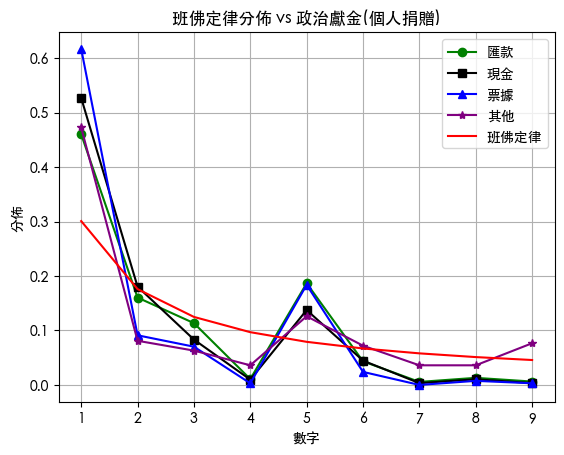

In [18]:
# 繪圖
digits = range(1, 10)

plt.plot(digits, benford_result['匯款'][1:10], label='匯款',color='green', marker='o', linestyle='-')
plt.plot(digits, benford_result['現金'][1:10], label='現金',color='black', marker='s', linestyle='-')
plt.plot(digits, benford_result['票據'][1:10], label='票據',color='blue', marker='^', linestyle='-')
plt.plot(digits, benford_result['其他'][1:10], label='其他',color='purple', marker='*', linestyle='-')

plt.plot(digits, expected, label="班佛定律", color='red',linestyle='-')

plt.xlabel('數字')
plt.ylabel('分佈')
plt.title("班佛定律分佈 vs 政治獻金(個人捐贈)")
plt.legend()
plt.grid(True)
plt.show()

## 費用支出

In [19]:
# 篩選 
# [收支]=支出
# 
df3 = df[df["收支"] == "支出"].copy()

# 資料筆數
print(f"資料總筆數：\t{df.shape[0]:10,d}")
print(f"支出筆數：\t{df3.shape[0]:10,d}")

資料總筆數：	   188,566
支出筆數：	   119,099


In [20]:
df3["收支科目"].value_counts()

收支科目
雜支支出         46832
人事費用支出       20304
交通旅運支出       18655
宣傳支出         15761
集會支出          8077
租用宣傳車輛支出      4271
公共關係費用支出      3015
租用競選辦事處支出     1345
返還捐贈支出         815
繳庫支出            24
Name: count, dtype: int64

In [21]:
# 只分析前四項： 雜支支出, 人事費用支出, 交通旅運支出, 宣傳支出
cate = ['雜支支出','人事費用支出','交通旅運支出','宣傳支出']
df3 = df3[df3['收支科目'].isin(cate)]

In [22]:
# 支出金額有負值
df3[df3['支出金額'] <= 0].head()

,選舉人,選舉名稱,收支科目,對象,ID,收入金額,支出金額,支出用途,金錢類,捐贈方式,返還/繳庫,揭露支出對象,更正註記,更正日期,收支
22267,鍾佳濱,113年立法委員選舉,雜支支出,裕順請帖印刷燙金社,21679060,0.0,-20000.0,瓶裝水棧板押金,金錢,NaN,NaN,否,NaN,NaN,支出
22360,鍾佳濱,113年立法委員選舉,宣傳支出,道格廣告企業社,99246738,0.0,-730.0,製作競選物品或宣傳廣告費用,金錢,NaN,NaN,否,NaN,NaN,支出
26053,郭國文,113年立法委員選舉,宣傳支出,南天有線電視股份有限公司,89407740,0.0,-14286.0,播放、傳送或刊登宣傳廣告費用,金錢,NaN,NaN,否,NaN,NaN,支出
26088,郭國文,113年立法委員選舉,人事費用支出,林忠和,Q12*******,0.0,-6000.0,其他因工作酬勞之給付,金錢,NaN,NaN,否,NaN,NaN,支出
26124,郭國文,113年立法委員選舉,雜支支出,捷報無線通訊器材行,19701946,0.0,-2500.0,雜項購置或修繕費用,金錢,NaN,NaN,否,NaN,NaN,支出


In [23]:
# 建立一個長度為10的整數陣列，儲存 0-9 數字的累計
display(cate)
benford_data = {}
for name in cate:
    benford_data[name] = np.zeros(10,dtype=int)

['雜支支出', '人事費用支出', '交通旅運支出', '宣傳支出']

In [24]:
df3["收支科目"].value_counts()

收支科目
雜支支出      46832
人事費用支出    20304
交通旅運支出    18655
宣傳支出      15761
Name: count, dtype: int64

In [25]:
# 逐筆累計
for idx,row in df3.iterrows():
    calc_first_digit(benford_data, row['收支科目'],row['支出金額'])

In [26]:
print(benford_data)

{'雜支支出': array([    0, 14509,  7676,  6276,  4312,  3634,  3188,  2569,  2360,
        2308]), '人事費用支出': array([   0, 6593, 3679, 2810, 1800, 2114, 1437,  674,  687,  510]), '交通旅運支出': array([   0, 9494, 1875, 1294,  831, 1131,  898, 1048,  966, 1118]), '宣傳支出': array([   0, 4295, 2786, 2009, 1492, 1652, 1021,  780,  843,  883])}


In [27]:
# 計算分佈
benford_result = {}
for name in cate:
    benford_result[name] = np.zeros(10,dtype=float)
    sub_total = np.sum(benford_data[name][1:10])
    for i in range(1,10):
        benford_result[name][i] = benford_data[name][i]/sub_total

print(benford_result)

{'雜支支出': array([0.        , 0.30980953, 0.16390502, 0.13401093, 0.0920738 ,
       0.07759652, 0.06807311, 0.05485565, 0.05039289, 0.04928254]), '人事費用支出': array([0.        , 0.32471434, 0.18119582, 0.13839638, 0.08865248,
       0.10411742, 0.07077423, 0.03319543, 0.0338357 , 0.0251182 ]), '交通旅運支出': array([0.        , 0.50892522, 0.10050925, 0.06936478, 0.0445457 ,
       0.06062718, 0.04813723, 0.05617797, 0.05178236, 0.05993031]), '宣傳支出': array([0.        , 0.27250809, 0.17676543, 0.12746653, 0.09466404,
       0.10481568, 0.06478015, 0.04948925, 0.05348645, 0.05602436])}


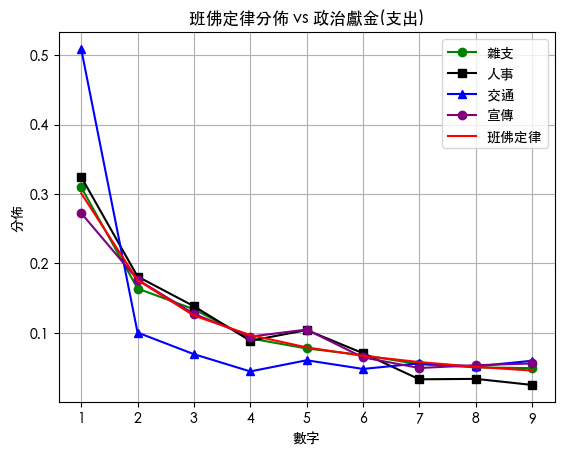

In [28]:
# 繪圖
digits = range(1, 10)

plt.plot(digits, benford_result['雜支支出'][1:10], label='雜支',color='green', marker='o', linestyle='-')
plt.plot(digits, benford_result['人事費用支出'][1:10], label='人事',color='black', marker='s', linestyle='-')
plt.plot(digits, benford_result['交通旅運支出'][1:10], label='交通',color='blue', marker='^', linestyle='-')
plt.plot(digits, benford_result['宣傳支出'][1:10], label='宣傳',color='purple', marker='o', linestyle='-')

plt.plot(digits, expected, label="班佛定律", color='red',linestyle='-')

plt.xlabel('數字')
plt.ylabel('分佈')
plt.title("班佛定律分佈 vs 政治獻金(支出)")
plt.legend()
plt.grid(True)
plt.show()

## 總結
* 捐贈收入，同一般紅包，會有喜好區別，如避免 4
* 支出較無上述現象，依上述結果，交通費可能需加重查核